In [3]:
import sys
sys.path.insert(1,'..')
import learnHeat as lh
from importlib import reload
lh = reload(lh)
import pygsp as pg
import numpy as np
import random
import scores_table as scort
scort = reload(scort)
import matplotlib.pyplot as plt

Let's check how the windows behave!! For different sized windows! And medium and median and different quantiles... And persistent things

In [56]:
trial = np.load('trials2.npy')
trial += 1
experiments = 10
N = 10
tau0 = [0.5,1,2.5,4]
quantiles = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
windows = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5]
finesse = [16, 32, 64, 128, 256, 512, 1024]
alpha = 0.01
beta = 0.1
score_res = np.zeros([experiments,3,len(quantiles),4,2])
max_iter = 50
for i in range(experiments):
    L1 = lh.heat_graph_RBF(N,kappa=0.75,sigma=0.5)
    L3 = lh.heat_graph_ER(N)
    L4 = lh.heat_graph_BA(N)
    X1 = lh.create_deltas(L1,tau0)
    X3 = lh.create_deltas(L3,tau0)
    X4 = lh.create_deltas(L4,tau0)
    res1 = lh.learn_heat(X1,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
    res3 = lh.learn_heat(X3,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
    res4 = lh.learn_heat(X4,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
    LL1 = res1["L"]
    LL1[abs(LL1)<0.001] = 0
    LL3 = res3["L"]
    LL3[abs(LL3)<0.001] = 0
    LL4 = res4["L"]
    LL1[abs(LL4)<0.001] = 0
    ground_laplacians = [L1,L3,L4]
    learned_laplacians = [LL1,LL3,LL4]

    # do the experiments, at random, quantiles in 0, 0.25, 0.5, 0.75
    # window at 0.01, 0.1, 0.25, 0.5, 0.75
    # finesse at 1000, 100, 10, 5
    for j in range(3):
        # do stuff
        for q in range(len(quantiles)):
            score_res[i,j,q,0,:] = scort.both_scores(lh.heat_quantile(learned_laplacians[j],quantiles[q]),ground_laplacians[j])
        for f in range(len(finesse)):
            score_res[i,j,f,1,:] = scort.both_scores(lh.heat_persistent(learned_laplacians[j],finesse[f]),ground_laplacians[j])
        for w in range(len(windows)):
            score_res[i,j,w,2,:] = scort.both_scores(lh.weight_clusters(learned_laplacians[j],windows[w]),ground_laplacians[j])
        score_res[i,j,0,3,:] = scort.both_scores(lh.heat_threshold(learned_laplacians[j],np.random.rand()),ground_laplacians[j])

np.save(f"noparams_CONV_QUANT_PERS_{trial}_experiments{experiments}_N{N}_iter{max_iter}.npy",score_res)
np.save("trials2.npy",trial)

/home/aner/Documents/math/learning_graphs/persistence/../scores_table.py:47: RuntimeWarning: invalid value encountered in scalar divide
  recall = true_positives / (true_positives + false_negatives)
/home/aner/Documents/math/learning_graphs/persistence/../scores_table.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  f_score = 2/  (1 / precision + 1 / recall)


In [3]:
trial = np.load('trials2.npy')
trial += 1
experiments = 50
N = 40
tau0 = [0.5,1,2.5,4]
quantiles = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
windows = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5]
finesse = [16, 32, 64, 128, 256, 512, 1024]
alpha = 0
beta = 0
score_res = np.zeros([experiments,3,len(quantiles),4,2])
max_iter = 50
for i in range(experiments):
    L1 = lh.heat_graph_RBF(N,kappa=0.75,sigma=0.5)
    L3 = lh.heat_graph_ER(N)
    L4 = lh.heat_graph_BA(N)
    X1 = lh.create_deltas(L1,tau0)
    X3 = lh.create_deltas(L3,tau0)
    X4 = lh.create_deltas(L4,tau0)
    res1 = lh.learn_heat(X1,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
    res3 = lh.learn_heat(X3,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
    res4 = lh.learn_heat(X4,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
    LL1 = res1["L"]
    LL1[abs(LL1)<0.001] = 0
    LL3 = res3["L"]
    LL3[abs(LL3)<0.001] = 0
    LL4 = res4["L"]
    LL1[abs(LL4)<0.001] = 0
    ground_laplacians = [L1,L3,L4]
    learned_laplacians = [LL1,LL3,LL4]

    # do the experiments, at random, quantiles in 0, 0.25, 0.5, 0.75
    # window at 0.01, 0.1, 0.25, 0.5, 0.75
    # finesse at 1000, 100, 10, 5
    for j in range(3):
        # do stuff
        for q in range(len(quantiles)):
            score_res[i,j,q,0,:] = scort.both_scores(lh.heat_quantile(learned_laplacians[j],quantiles[q]),ground_laplacians[j])
        for f in range(len(finesse)):
            score_res[i,j,f,1,:] = scort.both_scores(lh.heat_persistent(learned_laplacians[j],finesse[f]),ground_laplacians[j])
        for w in range(len(windows)):
            score_res[i,j,w,2,:] = scort.both_scores(lh.weight_clusters(learned_laplacians[j],windows[w]),ground_laplacians[j])
        score_res[i,j,0,3,:] = scort.both_scores(lh.heat_threshold(learned_laplacians[j],np.random.rand()),ground_laplacians[j])


np.save(f"noparams_CONV_QUANT_PERS_{trial}_experiments{experiments}_N{N}_iter{max_iter}.npy",score_res)
np.save("trials2.npy",trial)

KeyboardInterrupt: 

In [ ]:
    # finesse at 1000, 100, 10, 5
CONV_QUANT_PERS_17_experiments50_N20_iter50 este no valeeeee
for j in range(3):
        # do stuff
        for q in range(len(quantiles)):
            score_res[i,j,q,0,0,0,:] = scort.both_scores(lh.heat_quantile(learned_laplacians[j],quantiles[q]),ground_laplacians[j])
        for f in range(len(finesse)):
            score_res[i,j,0,f,0,0,:] = scort.both_scores(lh.heat_persistent(learned_laplacians[j],finesse[f]),ground_laplacians[j])
        for w in range(len(windows)):
            score_res[i,j,0,0,w,0,:] = scort.both_scores(lh.weight_clusters(learned_laplacians[j],windows[w]),ground_laplacians[j])
        score_res[i,j,0,0,0,1,0] = lh.heat_numedges(learned_laplacians[j])
        score_res[i,j,0,0,0,1,1] = lh.heat_numedges(ground_laplacians[j])

In [4]:
check = np.load("CONV_QUANT_PERS_23_experiments50_N40_iter50.npy")
check_prime = np.load("CONV_QUANT_PERS_22_experiments50_N40_iter50.npy")
check_wparams = np.concatenate((check,check_prime),axis=0)

In [5]:
check_wparams.shape[:]

(100, 3, 11, 4, 2)

In [7]:
check_wparams[0,0,:,2,0]

array([0.36054422, 0.35      , 0.34385965, 0.36054422, 0.36054422,
       0.36054422, 0.36054422, 0.36054422, 0.        , 0.        ,
       0.        ])

In [14]:
np.mean(check_wparams[:,0,0:7,1,0],axis=0)

array([0.30041157, 0.27337549, 0.23907344, 0.23915762, 0.26086692,
       0.2919777 , 0.3277588 ])

In [5]:
check2 = np.load("noparams_CONV_QUANT_PERS_25_experiments50_N40_iter50.npy")
check2prime = np.load("noparams_CONV_QUANT_PERS_24_experiments50_N40_iter50.npy")
check_params = np.concatenate((check2,check2prime),axis=0)

In [243]:
np.mean(check_params[:,2,:,0,0],axis=0)

array([0.28465283, 0.64848037, 0.44340737, 0.33371277, 0.26602731,
       0.22105817, 0.18887719, 0.16475833, 0.14599061, 0.13111281,
       0.12008603])

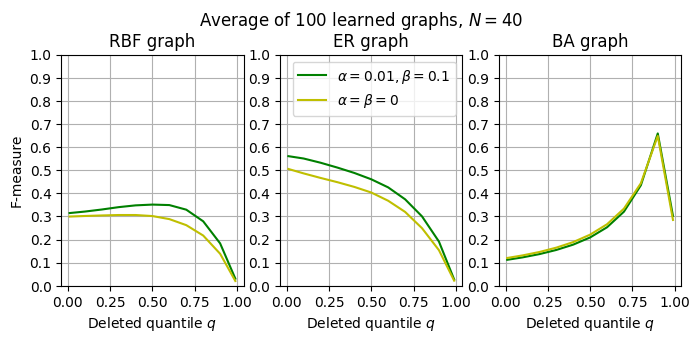

In [17]:
def plot_quantiles(check,check2,type):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 100 learned graphs, $N=40$"),y=1.03)
    titles = ["RBF graph","ER graph","BA graph"]
    for r in range(3):
        aux = np.mean(check[:,r,:,type,0],axis=0).reshape(-1)
        aux2 = np.mean(check2[:,r,:,type,0],axis=0).reshape(-1)
        ax[r].plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],aux[::-1],label=r"$\alpha=0.01,\beta=0.1$",color='g')
        ax[r].plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],aux2[::-1],label=r"$\alpha=\beta=0$",color='y')
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Deleted quantile $q$")
        ax[r].set_xticks(np.linspace(0,1,5))
        ax[r].set_ylim(0,1)
        ax[r].set_yticks(np.linspace(0,1,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
    ax[1].legend()
plot_quantiles(check_wparams,check_params,type=0)

In [194]:
aux = np.mean(check[:,2,:,0,0],axis=0).reshape(-1)
check[:,2,0,0,0]

array([0.30434783, 0.30434783, 0.26666667, 0.30434783, 0.30434783,
       0.34042553, 0.22727273, 0.30434783, 0.30434783, 0.30434783,
       0.30434783, 0.30434783, 0.34042553, 0.34042553, 0.34042553,
       0.30434783, 0.30434783, 0.30434783, 0.30434783, 0.30434783,
       0.30434783, 0.30434783, 0.30434783, 0.26666667, 0.30434783,
       0.22727273, 0.30434783, 0.30434783, 0.30434783, 0.30434783,
       0.30434783, 0.30434783, 0.26666667, 0.30434783, 0.22727273,
       0.30434783, 0.34042553, 0.30434783, 0.30434783, 0.30434783,
       0.30434783, 0.34042553, 0.30434783, 0.30434783, 0.30434783,
       0.34042553, 0.30434783, 0.30434783, 0.26666667, 0.30434783])

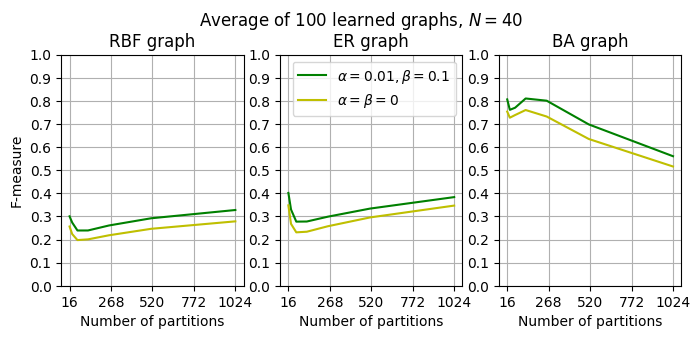

In [6]:
def plot_quantiles(check,check2,type,eje_x):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 100 learned graphs, $N=40$"),y=1.03)
    titles = ["RBF graph","ER graph","BA graph"]
    for r in range(3):
        aux = np.mean(check[:,r,0:len(eje_x),type,0],axis=0).reshape(-1)
        aux2 = np.mean(check2[:,r,0:len(eje_x),type,0],axis=0).reshape(-1)
        ax[r].plot(eje_x,aux,label=r"$\alpha=0.01,\beta=0.1$",color='g')
        ax[r].plot(eje_x,aux2,label=r"$\alpha=\beta=0$",color='y')
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Number of partitions")
        ax[r].set_ylim(0,1)
        ax[r].set_xticks(np.linspace(16,1024,5))
        ax[r].set_yticks(np.linspace(0,1,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
    ax[1].legend()
plot_quantiles(check_wparams,check_params,1,[16, 32, 64, 128, 256, 512, 1024])

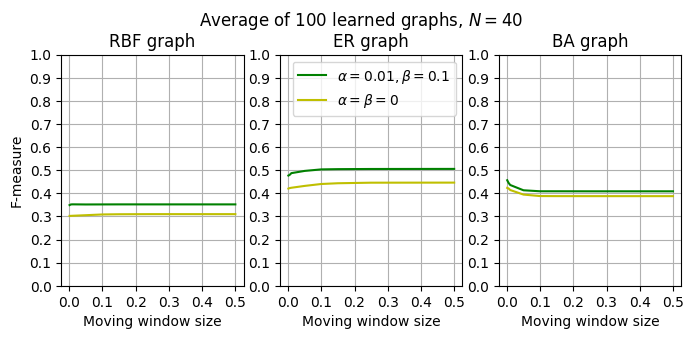

In [24]:
def plot_quantiles(check,check2,type,eje_x):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 100 learned graphs, $N=40$"),y=1.03)
    titles = ["RBF graph","ER graph","BA graph"]
    for r in range(3):
        aux = np.mean(check[:,r,0:len(eje_x),type,0],axis=0).reshape(-1)
        aux2 = np.mean(check2[:,r,0:len(eje_x),type,0],axis=0).reshape(-1)
        ax[r].plot(eje_x,aux,label=r"$\alpha=0.01,\beta=0.1$",color='g')
        ax[r].plot(eje_x,aux2,label=r"$\alpha=\beta=0$",color='y')
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Moving window size")
        ax[r].set_ylim(0,1)
        ax[r].set_xticks(np.linspace(0,0.5,6))  
        ax[r].set_yticks(np.linspace(0,1,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
    ax[1].legend()
plot_quantiles(check_wparams,check_params,2,[0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5])

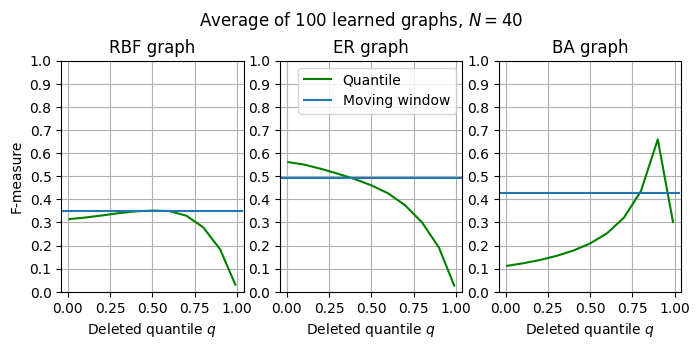

In [21]:
def plot_quantiles(check,check2,type,eje_x):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 100 learned graphs, $N=40$"),y=1.05)
    titles = ["RBF graph","ER graph","BA graph"]
    for r in range(3):
        aux = np.mean(check[:,r,:,type,0],axis=0).reshape(-1)
        auxh = np.mean(np.mean(check[:,r,0:len(eje_x),2,0],axis=0).reshape(-1))
        ax[r].plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],aux[::-1],label="Quantile",color='g')
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Deleted quantile $q$")
        ax[r].set_xticks(np.linspace(0,1,5))
        ax[r].axhline(y=auxh,label="Moving window",xmin=0.01,xmax=0.99)
        ax[r].set_ylim(0,1)
        ax[r].set_yticks(np.linspace(0,1,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
    ax[1].legend()
plot_quantiles(check_wparams,check_params,0,[16, 32, 64, 128, 256, 512, 1024])

In [260]:
L = lh.heat_graph_BA(20)
tau0 = [0.5,1,2.5,4]
X = lh.create_deltas(L,tau0)
res = lh.learn_heat(X,tau0=tau0,alpha=0.01,beta=0.1,max_iter=40)

In [261]:
edges_ground = lh.heat_numedges(L)
edges_ground

19.0

In [262]:
L2 = res["L"]
L2[abs(L2)<0.001] = 0
L3 = lh.heat_quantile(L2,0.99)
lh.heat_numedges(L3)

108.5

In [263]:
L4 = lh.heat_quantile(L2,0.01)
lh.heat_numedges(L4)
scort.scores(L4,L)

0.1